In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import pickle

with open('baocmbsne_gaussian_method_results.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

h0_min_sne = loaded_data['h0_min_sne']
omm_min_sne = loaded_data['omm_min_sne']
h0_std_sne = loaded_data['h0_std_sne']
omm_std_sne = loaded_data['omm_std_sne']
h0_min_bao = loaded_data['h0_min_bao']
omm_min_bao = loaded_data['omm_min_bao']
h0_std_bao = loaded_data['h0_std_bao']
omm_std_bao = loaded_data['omm_std_bao']
h0_min_cmb = loaded_data['h0_min_cmb']
omm_min_cmb = loaded_data['omm_min_cmb']
h0_std_cmb = loaded_data['h0_std_cmb']
omm_std_cmb = loaded_data['omm_std_cmb']
param = loaded_data['param']


x = np.linspace(0.1, 0.6, 1000)


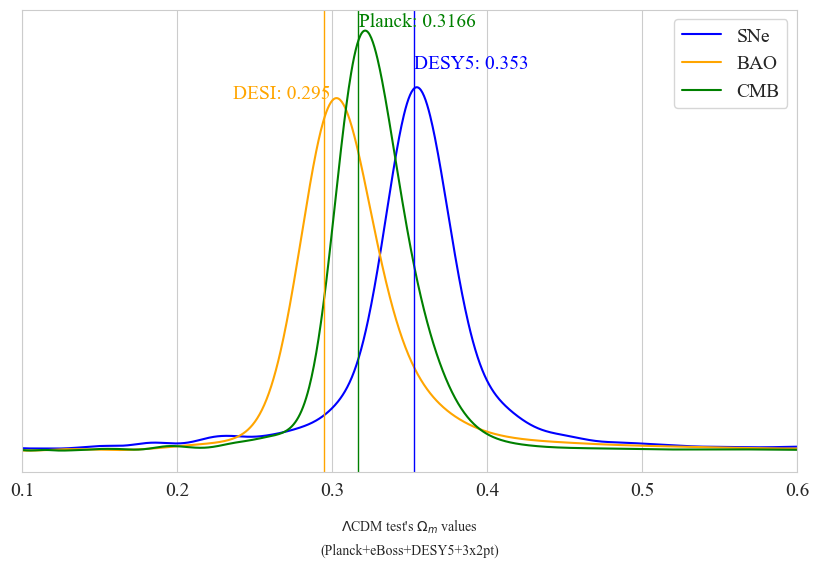

In [2]:
def calculate_om0_distributions(x, omm_min, omm_std, label, color):
    total_distribution = np.zeros_like(x)
    for mu, sigma in zip(omm_min, omm_std):
        if not np.isnan(mu) and not np.isnan(sigma):
            total_distribution += norm.pdf(x, mu, sigma)
    total_distribution /= np.sum(total_distribution)
    plt.plot(x, total_distribution, label=label, color=color)
    return total_distribution
plt.figure(figsize=(10, 6))


plt.rc('font', family='serif', serif='Times New Roman', size=14)
plt.rcParams['axes.labelsize'] = 14


sne_distribution = calculate_om0_distributions(x, omm_min_sne, omm_std_sne, label='SNe', color='blue')
bao_distribution = calculate_om0_distributions(x, omm_min_bao, omm_std_bao, label='BAO', color='orange')
cmb_distribution = calculate_om0_distributions(x, omm_min_cmb, omm_std_cmb, label='CMB', color='green')

plt.axvline(0.353, color='blue', linestyle='-', linewidth=1)
plt.text(0.353, max(sne_distribution)*1.05, 'DESY5: 0.353', color='blue')

plt.axvline(0.295, color='orange', linestyle='-', linewidth=1)
plt.text(0.236, max(bao_distribution), 'DESI: 0.295', color='orange')

plt.axvline(0.3166, color='green', linestyle='-', linewidth=1)
plt.text(0.3175, max(cmb_distribution)*1.01, 'Planck: 0.3166', color='green')

plt.xlim(0.1, 0.6)
#plt.xlabel('$\Lambda$CDM test\'s $\Omega_{m}$ values\n(Planck+eBoss+DESY5+3x2pt)')
plt.xlabel('$\Lambda$CDM test\'s $\Omega_{m}$ values', fontsize=10,)
plt.gca().xaxis.set_label_coords(0.5, -0.1)  
plt.text(0.5, -0.18, r'(Planck+eBoss+DESY5+3x2pt)', fontsize=10, ha='center', transform=plt.gca().transAxes)

plt.gca().axes.get_yaxis().set_visible(False)

plt.legend()

plt.savefig("w0wa_to_lcdm_all.png", dpi=400, bbox_inches='tight')

plt.show()